# AllLife Credit Card Customer Segmentation

In [3]:
# importing libraries

import numpy as np   
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
# to handle data in form of rows and columns 
import pandas as pd    
# importing ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
#importing seaborn for statistical plots
import seaborn as sns
from sklearn import metrics
import pandas as pd

from scipy.stats import zscore

In [4]:
# reading the CSV file into pandas dataframe
mydata = pd.read_csv("Credit Card Customer Data.csv")

In [5]:
mydata.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
mydata.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
mydata['Customer Key'].nunique()

655

In [9]:
mydata.shape

(660, 7)

In [10]:
# looks like there are 5 customer id duplicates. we need to drop those if those are same recorsd to avoid unnecessary bias.

In [11]:
mydata[mydata['Customer Key'].duplicated()]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [12]:
mydata[mydata['Customer Key']==47437] # checking if the records are duplictaes

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


In [13]:
mydata[mydata['Customer Key']==96929] # checking if the records are duplictaes

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


In [14]:
mydata[mydata['Customer Key']==37252] # checking if the records are duplictaes

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


In [15]:
mydata[mydata['Customer Key']==50706] # checking if the records are duplictaes

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


In [16]:
mydata[mydata['Customer Key']==97935] # checking if the records are duplictaes

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


Duplicte ID's do not have the duplicate records. It can be becase the same customer having accounts in two different banches etc. so I will leave the data as is.

In [17]:
#Remove Customer Key and Sl_No since these are not useful for the analysis
mydata.drop('Customer Key', axis=1, inplace=True)

In [18]:
mydata.drop('Sl_No', axis=1, inplace=True)

In [19]:
mydata.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [20]:
# Check for missing value
mydata.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [21]:
mydata.corr(method='kendall')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.393034,0.082167,-0.078739,-0.326996
Total_Credit_Cards,0.393034,1.000000,0.296640,-0.242907,-0.492532
Total_visits_bank,0.082167,0.296640,1.000000,-0.512982,-0.373968
Total_visits_online,-0.078739,-0.242907,-0.512982,1.000000,0.310855
Total_calls_made,-0.326996,-0.492532,-0.373968,0.310855,1.000000


I do not see a good correliation beween data catogoies, except the fact that the total calls and online visits shows a negative corrialtion with banck vists which is explanatory. 

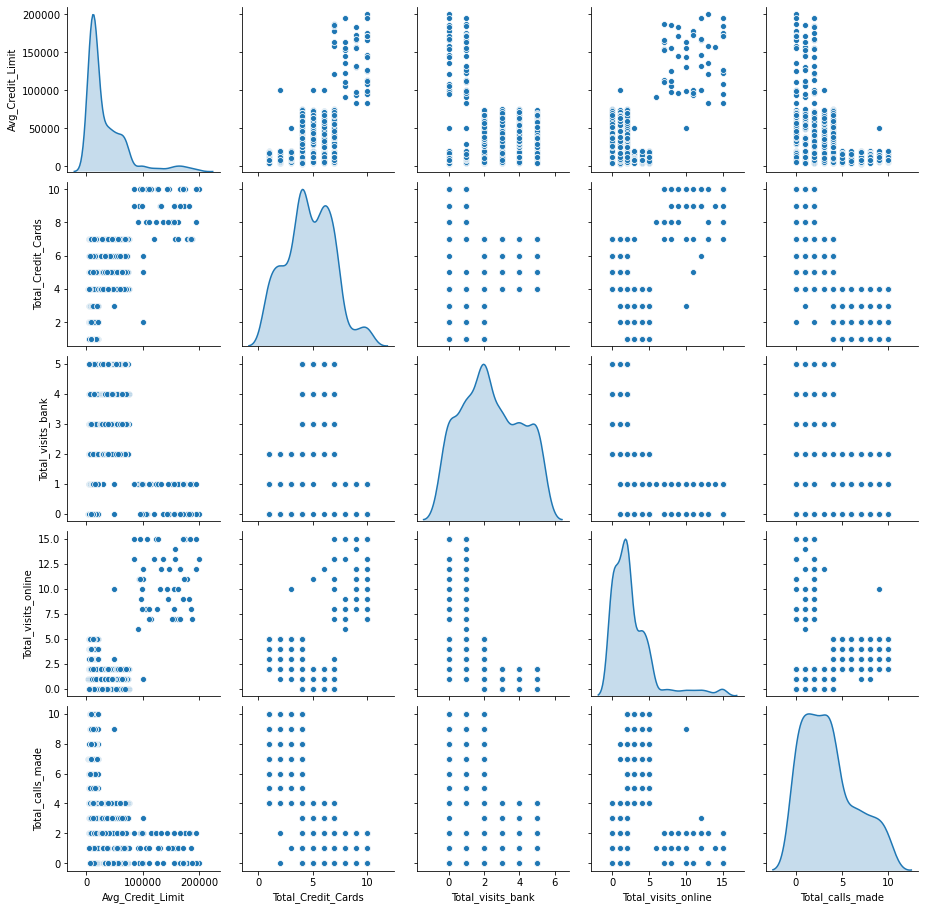

In [22]:
sns.pairplot(mydata,diag_kind='kde')

Observations
From diagonal plots we can see 
- Total calls made: has 3 points
- Total visits online - shows 3-4 peaks
- Total bank visits -shows 2 major peaks
- Total credit cards -shows 4 major peaks
- Avg crdit limit -shows 3 major peaks

from bivariate plots we can see that bank visits shows negative liner relationship total online visits and calls made. total online vists and total credit cards have a positive corrilation. same with the average credit limits.  


------------------------------------------------------------------------------------------------------------------------------

'Avg_Credit_Limit' has to be scaled to match with the values of the other data

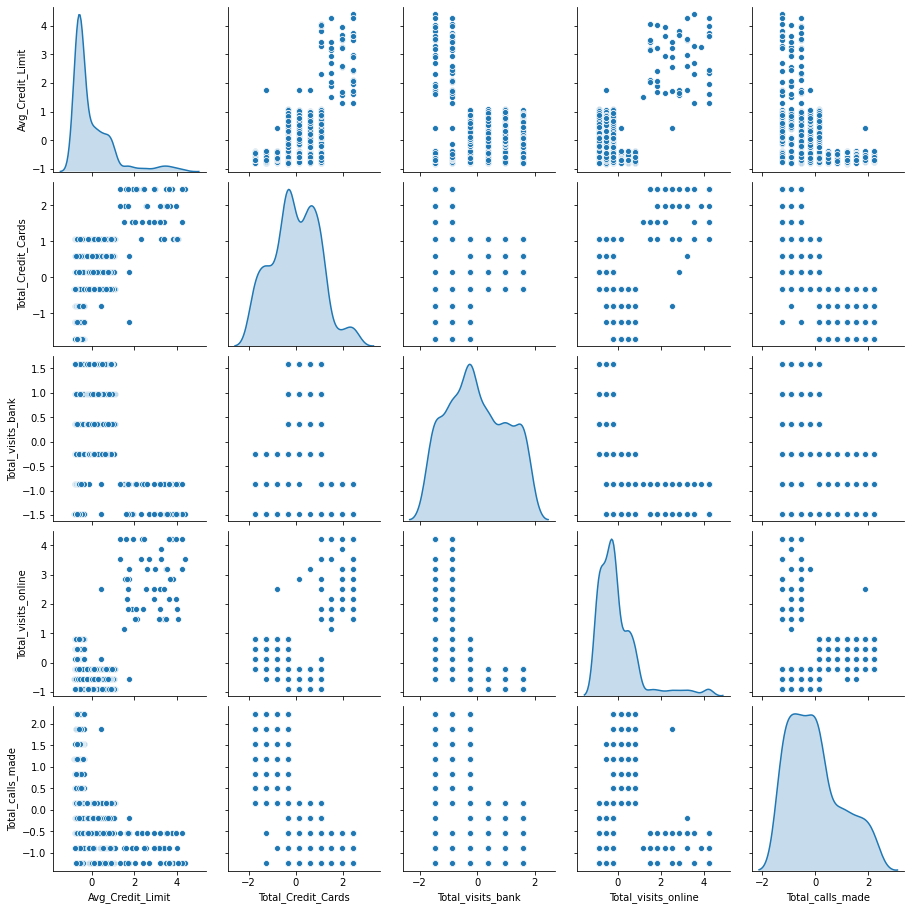

In [23]:
mydataScaled=mydata.apply(zscore)
sns.pairplot(mydataScaled,diag_kind='kde')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

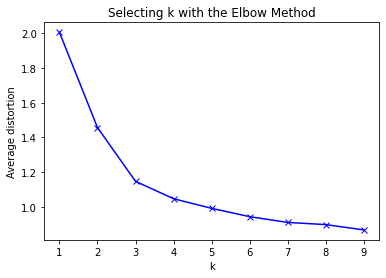

In [24]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydataScaled)
    prediction=model.predict(mydataScaled)
    meanDistortions.append(sum(np.min(cdist(mydataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / mydataScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

There are two clear bends , but if i analysze shape I can take 3 clusters. So I can say we can considrer 2-3 clusters.

In [25]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(mydataScaled)
prediction=final_model.predict(mydataScaled)

#Append the prediction 
mydata["GROUP"] = prediction
mydataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
mydata.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,1


Analyze the distribution of the data among the two groups (K = 2) using boxplot.

In [26]:
mydataClust = mydata.groupby(['GROUP'])
mydataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,46082.568807,5.885321,3.158257,2.119266,1.894495


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C76CD83280>,
      dtype=object)

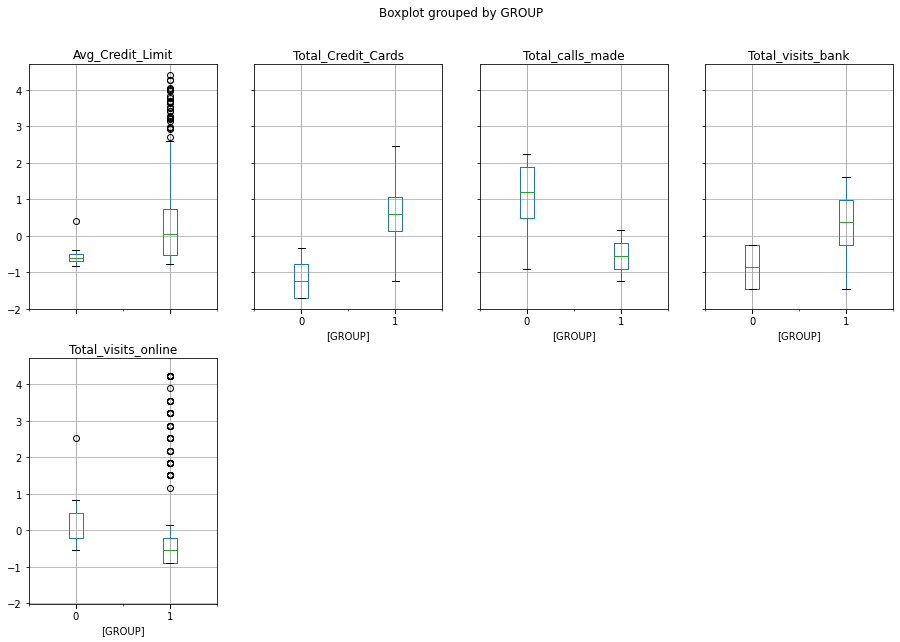

In [27]:
mydataScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [28]:
# analyzing with K = 3
final_model=KMeans(3)
final_model.fit(mydataScaled)
prediction=final_model.predict(mydataScaled)

#Append the prediction 
mydata["GROUP"] = prediction
mydataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
mydata.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000162258929A0>,
      dtype=object)

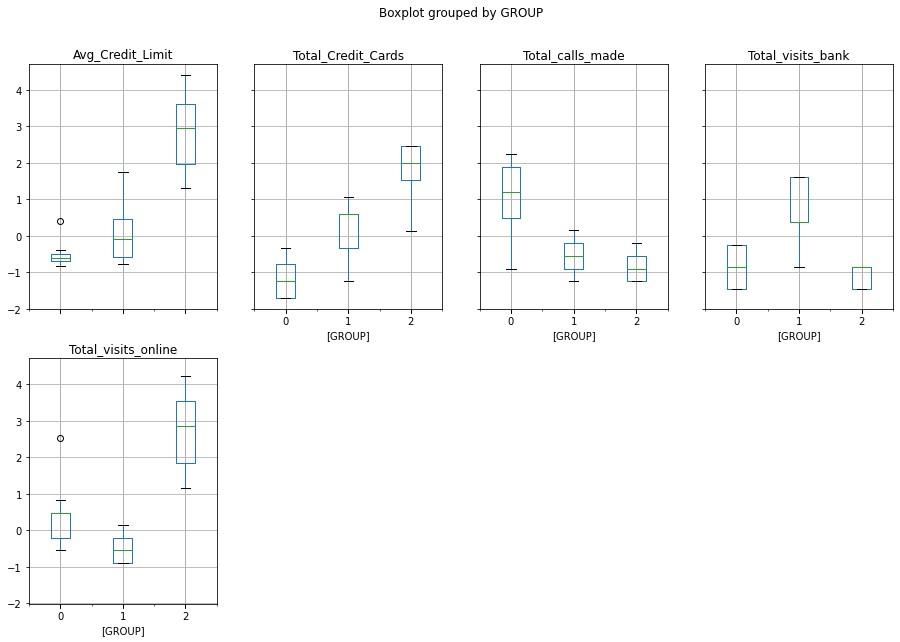

In [29]:
mydataScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In two groups cluster there are many outliers in group 1, in three group cluster I see a fair distribution of data amoung the groups.

In [30]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [34]:
# cophenet index for correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(mydataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(mydataScaled))

c

0.9102691112621796

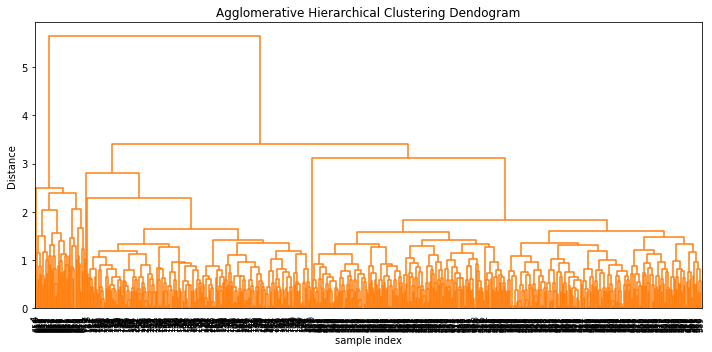

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [39]:
Z = linkage(mydataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(mydataScaled))

c

0.7566252666432097

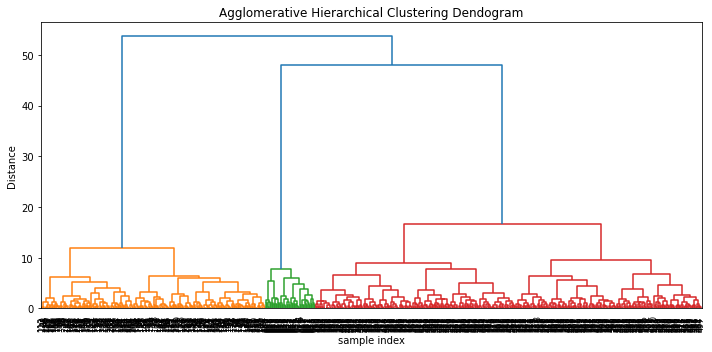

In [40]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [41]:
Z = linkage(mydataScaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(mydataScaled))

c

0.8981791108157512

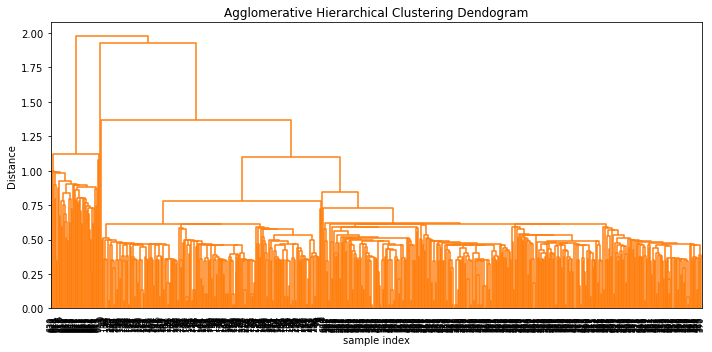

In [42]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [43]:
Z = linkage(mydataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(mydataScaled))

c

0.884420725860894

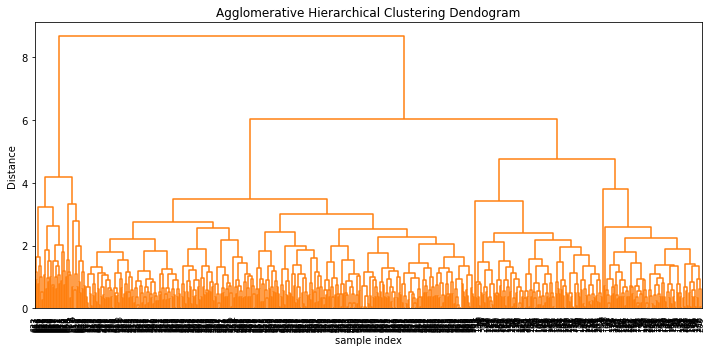

In [44]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [45]:
Z = linkage(mydataScaled, metric='euclidean', method='centroid')
c, coph_dists = cophenet(Z , pdist(mydataScaled))

c

0.906845257340526

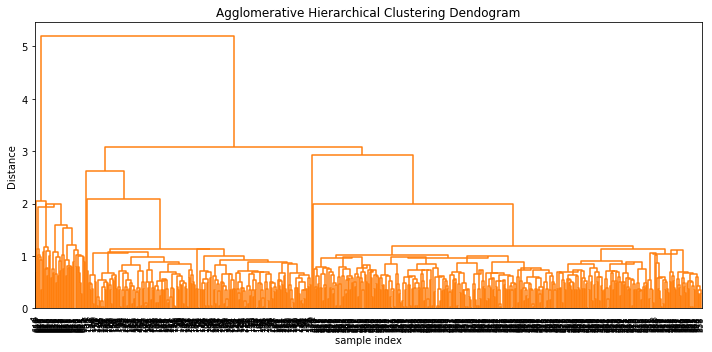

In [46]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

best performance I got it from average linkage method. 

Conclusion: We can identify, 3 customer groups. Customers who do online visits and making more calls lies with customers who have more credit line and number of credit cards. If we can obtain customers income level or employemnt catogory , analysis may have given more valid customer segmentation. 